# Project Work 2


## The Digits Dataset

In [57]:
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()


In [9]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

## Exercise 1 - Describe the dataset

### Question 1: How many instances has the dataset?

In [10]:
# 1797 instances, each having 64 features
digits.data.shape


(1797, 64)

<h3>Answer: the dataset has 1797 instances, each having 64 features</h3>

In [12]:
print (digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### Question 2: How many classes (type of digits) has the data set?

In [14]:
#the number of digits types in the dataset are from 0 to 9.
print (digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


<h3>Answer: The dataset has 10 classes, corresponding to the digits from 0 to 9.</h3>

### Question 3: plot the digit at position 33 and include it in the Notebook (answer below)

In [16]:
print (digits.images[33])

[[ 0.  6. 13.  5.  8.  8.  1.  0.]
 [ 0.  8. 16. 16. 16. 16.  6.  0.]
 [ 0.  6. 16.  9.  6.  4.  0.  0.]
 [ 0.  6. 16. 16. 15.  5.  0.  0.]
 [ 0.  0.  4.  5. 15. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  9.  0.  0.]
 [ 0.  1.  8. 13. 15.  3.  0.  0.]
 [ 0.  4. 16. 15.  3.  0.  0.  0.]]


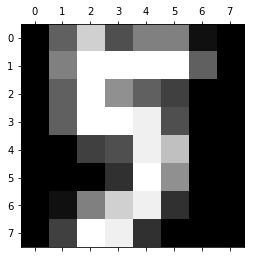

In [17]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[33]) 
plt.show() 

### Question 4: Transform the data into a DataFrame and plot the histogram of the first 5 features (from 0 to 4). Then describe what you notice.

In [31]:
digits_data = pd.DataFrame(digits.data)

digits_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [32]:
digits_subset = digits_data[[0,1,2,3,4]] 

In [33]:
digits_subset.head(10)

,0,1,2,3,4
0,0.0,0.0,5.0,13.0,9.0
1,0.0,0.0,0.0,12.0,13.0
2,0.0,0.0,0.0,4.0,15.0
3,0.0,0.0,7.0,15.0,13.0
4,0.0,0.0,0.0,1.0,11.0
5,0.0,0.0,12.0,10.0,0.0
6,0.0,0.0,0.0,12.0,13.0
7,0.0,0.0,7.0,8.0,13.0
8,0.0,0.0,9.0,14.0,8.0
9,0.0,0.0,11.0,12.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E2F4FD0>,
      dtype=object)

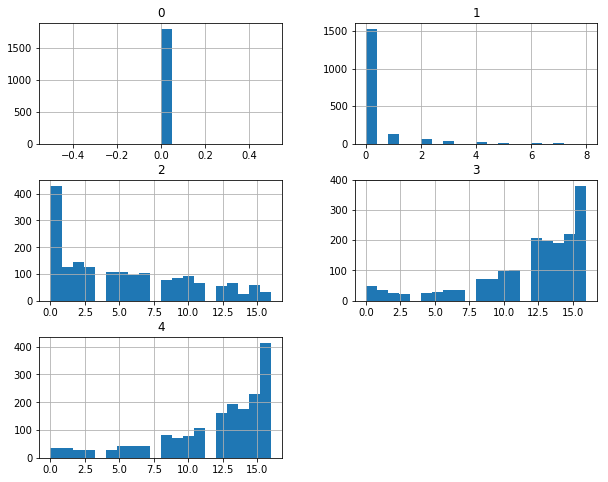

In [34]:
digits_subset.hist(bins=20, figsize=(10,8))

We can observe that the attributes have different scales.

## Exercise 2 - Implement a k-Means model

### 1. Normalize the data using a MinMaxScaler. Then implement a k-Means model using a random seed = 4 and k equal to the number of classes you found from previous exercise

In [35]:
# First, I the MinMaxScaler
scaler = MinMaxScaler()

# Then, I it to our data set using the fit_transform() method:
digits_scaled = scaler.fit_transform(digits_data)

#Now, I implement the k-means model. We know that the number of classes is 10

kmeans = KMeans(init= 'random',n_clusters=10, random_state= 4)

# We call the fit_predict method. Computes cluster centers and predict cluster index for each sample.
kmeans.fit_predict(digits_scaled)

# During the algorithm each data point in the dataset in assigned a cluster label
# we can see the labels using the labels_ attribute
print (kmeans.labels_)

[1 6 6 ... 6 3 3]


### 2. Using the following code show the images of the cluster centers created by k-Means. Performing a visual inspection, do you think the algorithm found reasonable clusters? Which of the images seem a bit unclear?

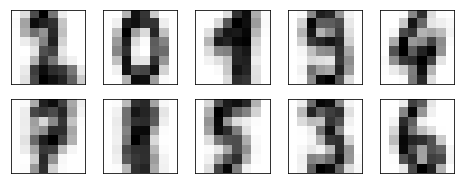

In [36]:
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Answer: The cluster seem reasonable, the only images that seem a bit unclear are 7 and 8.

### 3. Since this data set contains also the labels we can evaluate the performance of the algorithm using some of the classification metrics. Since k-means is not aware of the entity of the classes, the labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them using the following code.

In [42]:
labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_==i)
    labels[mask] = mode(digits.target[mask])[0]

### where clusters labels are the labels derived from the fit predict() method. Once done with this step, compute the accuracy and the confusion matrix using the labels of the data set and the clusters labels obtained. What can you notice from the confusion matrix? Examine the errors you get and try to justify those in comparison of the clusters' centers you plot before.

In [58]:
#first, I compute the accuracy

accuracy =accuracy_score(digits.target, labels)
print("Accuracy:")
print(accuracy)

#then the confusion matrix
conf_matrix = confusion_matrix(digits.target, labels)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:
0.7902058987200891
Confusion Matrix:
[[177   0   0   0   1   0   0   0   0   0]
 [  0  54  24   1   0   1   2   0 100   0]
 [  1   2 148  15   0   0   0   3   8   0]
 [  0   0   1 157   0   2   0   7   7   9]
 [  0   3   0   0 166   0   0   9   3   0]
 [  0   0   0   2   2 125   2   0   0  51]
 [  1   0   0   0   0   0 177   0   3   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   6   3   2   0   5   2   4 102  50]
 [  0  20   0   9   0   5   0   7   2 137]]


### We can notice that 100 eights are classified as ones, 51 nines are classified as fives and 50 as eights. Those are the more relevant errors. This is consistent with the fact that the "8" cluster was one the most unclear. Also, the "5" and "9" clusters look pretty similar.